In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
char_df = pd.read_csv('charity_data.csv')
char_df.head()

C:\Users\JD\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\JD\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\JD\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\JD\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
char_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [4]:
# Generate our categorical variable list
char_cat = char_df.dtypes[char_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
char_df[char_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [5]:
# Check the unique value counts to see if binning is required
classif_counts = char_df.CLASSIFICATION.value_counts()

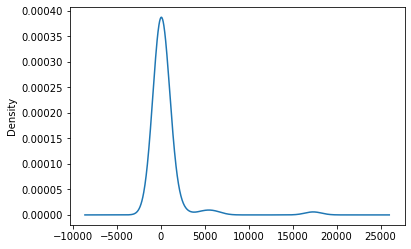

In [6]:
classif_counts.plot.density()

In [7]:
classif_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1248        1
C2600        1
C1370        1
C1900        1
C2570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# Determine which values to replace
replace_classif = list(classif_counts[classif_counts <= 1000].index)

# Replace in DataFrame
for classif in replace_classif:
    char_df.CLASSIFICATION = char_df.CLASSIFICATION.replace(classif,"Other")


# Check to make sure binning was successful
char_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

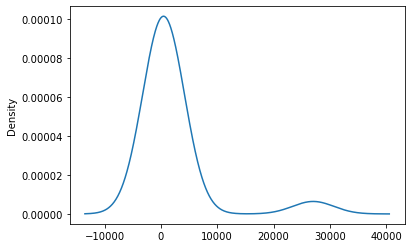

In [9]:
apply_counts = char_df.APPLICATION_TYPE.value_counts()
apply_counts.plot.density()

In [10]:
# Determine which values to replace
replace_apply = list(apply_counts[apply_counts <= 1000].index)

# Replace in DataFrame
for app in replace_apply:
    char_df.APPLICATION_TYPE = char_df.APPLICATION_TYPE.replace(app,"Other")


# Check to make sure binning was successful
char_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

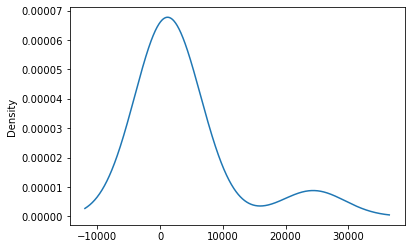

In [11]:
char_df[char_cat].nunique()
income_counts = char_df.INCOME_AMT.value_counts()
income_counts.plot.density()

In [12]:
# Determine which values to replace
replace_income = list(income_counts[income_counts <= 300].index)

# Replace in DataFrame
for app in replace_income:
    char_df.INCOME_AMT = char_df.INCOME_AMT.replace(app,"5M+")


# Check to make sure binning was successful
char_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
5M+                564
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [13]:
char_df = char_df.drop('NAME',1)
char_df = char_df.drop('EIN',1)

In [14]:
# Generate our categorical variable list
char_cat = char_df.dtypes[char_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
char_df[char_cat].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                7
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(char_df[char_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(char_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_5M+,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
char_df = char_df.merge(encode_df,left_index=True, right_index=True)
char_df = char_df.drop(char_cat,1)
char_df = char_df.drop('SPECIAL_CONSIDERATIONS_N',1)
char_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_5M+,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
# Remove loan status target from features data
y = char_df.IS_SUCCESSFUL.values
X = char_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 80)                3040      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 81        
Total params: 3,121
Trainable params: 3,121
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
25724/25724 [==============================] - 2s 93us/sample - loss: 0.5776 - acc: 0.7168
Epoch 2/50
25724/25724 [==============================] - 2s 81us/sample - loss: 0.5601 - acc: 0.7290
Epoch 3/50
25724/25724 [==============================] - 2s 84us/sample - loss: 0.5570 - acc: 0.7308
Epoch 4/50
25724/25724 [==============================] - 2s 83us/sample - loss: 0.5554 - acc: 0.7313
Epoch 5/50
25724/25724 [==============================] - 3s 99us/sample - loss: 0.5539 - acc: 0.7325
Epoch 6/50
25724/25724 [==============================] - 2s 89us/sample - loss: 0.5531 - acc: 0.7329
Epoch 7/50
25724/25724 [==============================] - 2s 84us/sample - loss: 0.5539 - acc: 0.7310
Epoch 8/50
25724/25724 [==============================] - 2s 96us/sample - loss: 0.5523 - acc: 0.7328
Epoch 9/50
25724/25724 [==============================] - 3s 106us/sample - loss: 0.5512 - acc: 0.7318
Epoch 10/50
25724/25724 [==============================] - 2s 92us/sample - loss:

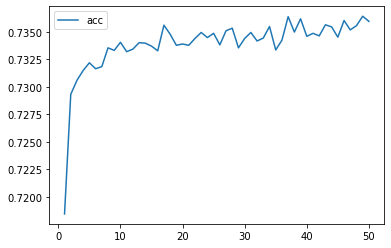

In [29]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="acc")

In [ ]:
## ATTEMPTING TO IMPROVE THE MODEL:


#- Adding an extra hidden layer
#- Increasing number of neurons to 80, 40, and 5 respectively
#- Using a different activation algorithm: Leaky ReLU
#- Increasing number of epochs to 100.

In [88]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features)
)
nn.add(tf.keras.layers.LeakyReLU(alpha=0.05))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2))
nn.add(tf.keras.layers.LeakyReLU(alpha=0.05))

# # Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="leaky_relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3))
nn.add(tf.keras.layers.LeakyReLU(alpha=0.05))

# # Fourth hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="leaky_relu"))
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4))
# nn.add(tf.keras.layers.LeakyReLU(alpha=0.05))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 80)                3040      
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 80)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 40)                3240      
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 40)                0         
_________________________________________________________________
dense_90 (Dense)             (None, 5)                 205       
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 5)                 0         
_________________________________________________________________
dense_91 (Dense)             (None, 1)               

Epoch 67/100
25724/25724 [==============================] - 3s 132us/sample - loss: 0.5400 - acc: 0.7392
Epoch 68/100
25724/25724 [==============================] - 3s 131us/sample - loss: 0.5398 - acc: 0.7389
Epoch 69/100
25724/25724 [==============================] - 3s 131us/sample - loss: 0.5400 - acc: 0.7388
Epoch 70/100
25724/25724 [==============================] - 3s 131us/sample - loss: 0.5402 - acc: 0.7397
Epoch 71/100
25724/25724 [==============================] - 3s 135us/sample - loss: 0.5399 - acc: 0.7388
Epoch 72/100
25724/25724 [==============================] - 3s 130us/sample - loss: 0.5399 - acc: 0.7394
Epoch 73/100
25724/25724 [==============================] - 3s 129us/sample - loss: 0.5397 - acc: 0.7388
Epoch 74/100
25724/25724 [==============================] - 3s 131us/sample - loss: 0.5394 - acc: 0.7392
Epoch 75/100
25724/25724 [==============================] - 3s 131us/sample - loss: 0.5399 - acc: 0.7390
Epoch 76/100
25724/25724 [=============================

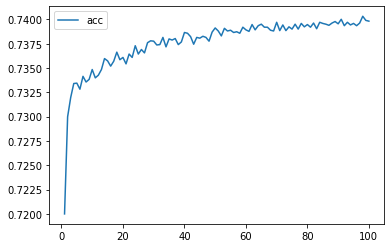

In [89]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="acc")